<a href="https://colab.research.google.com/github/anna-murphy-99/igpdemorepository/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will go through integrating/concatenating datasets and basic annotations including cell typing.

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/Lecture5_Annotation_Integration.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Packages

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=9ec845a09330b6347ecd72a109654b2d08ab4df97f344b8113af19b6b74310c0
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install setuptools==65.5.0 wheel==0.38.4

In [4]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 30.3 MB/s eta 0:00:00


In [5]:
!pip install anndata

In [6]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.8 MB/s eta 0:00:00


In [7]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

Cloning into 'single-cell-lectures'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 418 (delta 14), reused 13 (delta 5), pack-reused 392 (from 1)
Receiving objects: 100% (418/418), 204.80 MiB | 13.46 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Updating files: 100% (32/32), done.


## Import packages

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [14]:
! mkdir -p HW_5_data_1
! mkdir -p HW_5_data_2

! curl -O -J -L https://www.dropbox.com/scl/fi/2hyr2p28qhicqtkxr2ma9/L5_Dataset1_v2.h5ad?rlkey=gx6r5hqv46zfbop3m496eftjn&st=ue9m95lh&dl=0 -o L5_Dataset1_v2.h5ad
! curl -O -J -L https://www.dropbox.com/scl/fi/7oh25h3oel67yiuhyc308/L5_Dataset2_v2.h5ad?rlkey=mmn4ivhhe8qe41c56hu7nvbkn&st=7j7zqej8&dl=0 -o L5_Dataset2_v2.h5ad

/bin/bash: line 1: -o: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     26      0 --:--:-- --:--:-- --:--:--    26
100   491    0   491    0     0    467      0 --:--:--  0:00:01 --:--:--  1501
100 14.8M  100 14.8M    0     0  9053k      0  0:00:01  0:00:01 --:--:-- 9053k
/bin/bash: line 1: -o: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     25      0 --:--:-- --:--:-- --:--:--    25
100   491    0   491    0     0    437      0 --:--:--  0:00:01 --:--:--     0
100 15.7M  100 15.7M    0     0  8680k      0  0:00:01  0:00:01 --:--:-- 8680k


# Reading in and initial data processing

In [15]:
dataset_1 = sc.read_h5ad('L5_Dataset1_v2.h5ad')
dataset_2 = sc.read_h5ad('L5_Dataset2_v2.h5ad')
#

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
def normalization(dataset_1):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dataset_1)
    dataset_1.X = np.arcsinh(dataset_1).copy()
    dataset_1.layers['arcsinh'] = dataset_1.X.copy()
    sc.pp.scale(dataset_1)

    return dataset_1

In [17]:
def normalization(dataset_2):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dataset_2)
    dataset_2.X = np.arcsinh(dataset_2).copy()
    dataset_2.layers['arcsinh'] = dataset_2.X.copy()
    sc.pp.scale(dataset_2)

    return dataset_2

In [62]:
def normalization(dat_combo_inner):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_combo_inner)
    dat_combo_inner.X = np.arcsinh(dat_combo_inner).copy()
    dat_combo_inner.layers['arcsinh'] = dat_combo_inner.X.copy()
    sc.pp.scale(dat_combo_inner)

    return dat_combo_inner

In [18]:
dataset_1.raw = dataset_1.copy() # save a raw layer
dataset_2.raw = dataset_2.copy() # save a raw layer

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [63]:
dat_combo_inner.raw = dat_combo_inner.copy()

In [19]:
dataset_1

AnnData object with n_obs × n_vars = 2335 × 29577
    var: 'ENSG_ID'

In [20]:
dataset_2

AnnData object with n_obs × n_vars = 2200 × 29577
    var: 'ENSG_ID'

In [64]:
dat_combo_inner

AnnData object with n_obs × n_vars = 4535 × 29575
    obs: 'Dataset_ID'

In [35]:
normalization(dataset_1)

KeyboardInterrupt: 

In [ ]:
normalization(dataset_2)

In [65]:
normalization(dat_combo_inner)

KeyboardInterrupt: 

In [25]:
n_neighbors_1 = int( np.sqrt(dataset_1.n_obs) ) # an optimal number for k in KNN

In [26]:
n_neighbors_2 = int( np.sqrt(dataset_2.n_obs) ) # an optimal number for k in KNN

In [66]:
n_neighbors_combo = int( np.sqrt(dat_combo_inner.n_obs) ) # an optimal number for k in KNN

In [27]:
sc.tl.pca(dataset_1, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [28]:
sc.tl.pca(dataset_2, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [67]:
sc.tl.pca(dat_combo_inner, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [31]:
sc.pp.neighbors( dataset_1, n_neighbors= n_neighbors_1 , n_pcs=50, ) # make neighborhood graph

In [32]:
sc.pp.neighbors( dataset_2, n_neighbors= n_neighbors_2 , n_pcs=50, ) # make neighborhood graph

In [68]:
sc.pp.neighbors( dat_combo_inner, n_neighbors= n_neighbors_combo , n_pcs=50, ) # make neighborhood graph

In [70]:
sc.tl.umap(dat_combo_inner, random_state=0) # make UMAP

In [71]:
sc.tl.leiden( dat_combo_inner, resolution = 0.7)

<ipython-input-71-3c097ba39380>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden( dat_combo_inner, resolution = 0.7)


In [72]:
dat_combo_inner

AnnData object with n_obs × n_vars = 4535 × 29575
    obs: 'Dataset_ID', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [73]:
sc.set_figure_params(figsize=[4,4], dpi = 150)

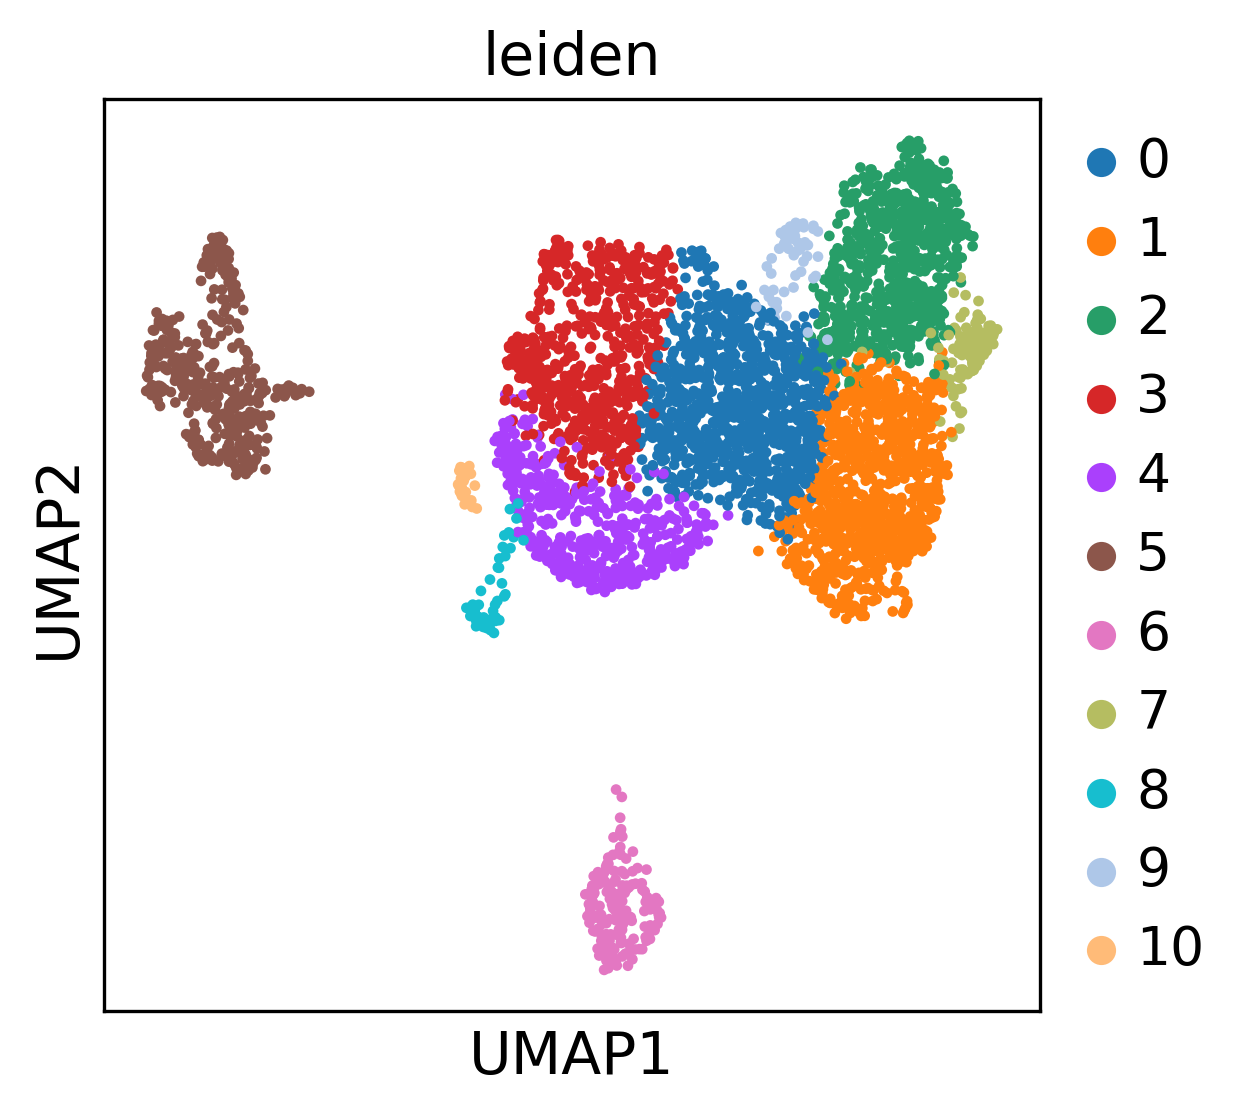

In [74]:
sc.pl.umap( dat_combo_inner, color = ['leiden'])

# Identifying different cell populations

In [82]:
def normalization(adata):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(adata)
    adata.X = np.arcsinh(adata.X).copy() # Apply arcsinh to adata.X
    adata.layers['arcsinh'] = adata.X.copy()
    sc.pp.scale(adata)

    return adata

dat_combo_inner = normalization(dat_combo_inner)



/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [83]:
# Run for differential gene expression of each leiden cluster
sc.tl.rank_genes_groups( dat_combo_inner, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

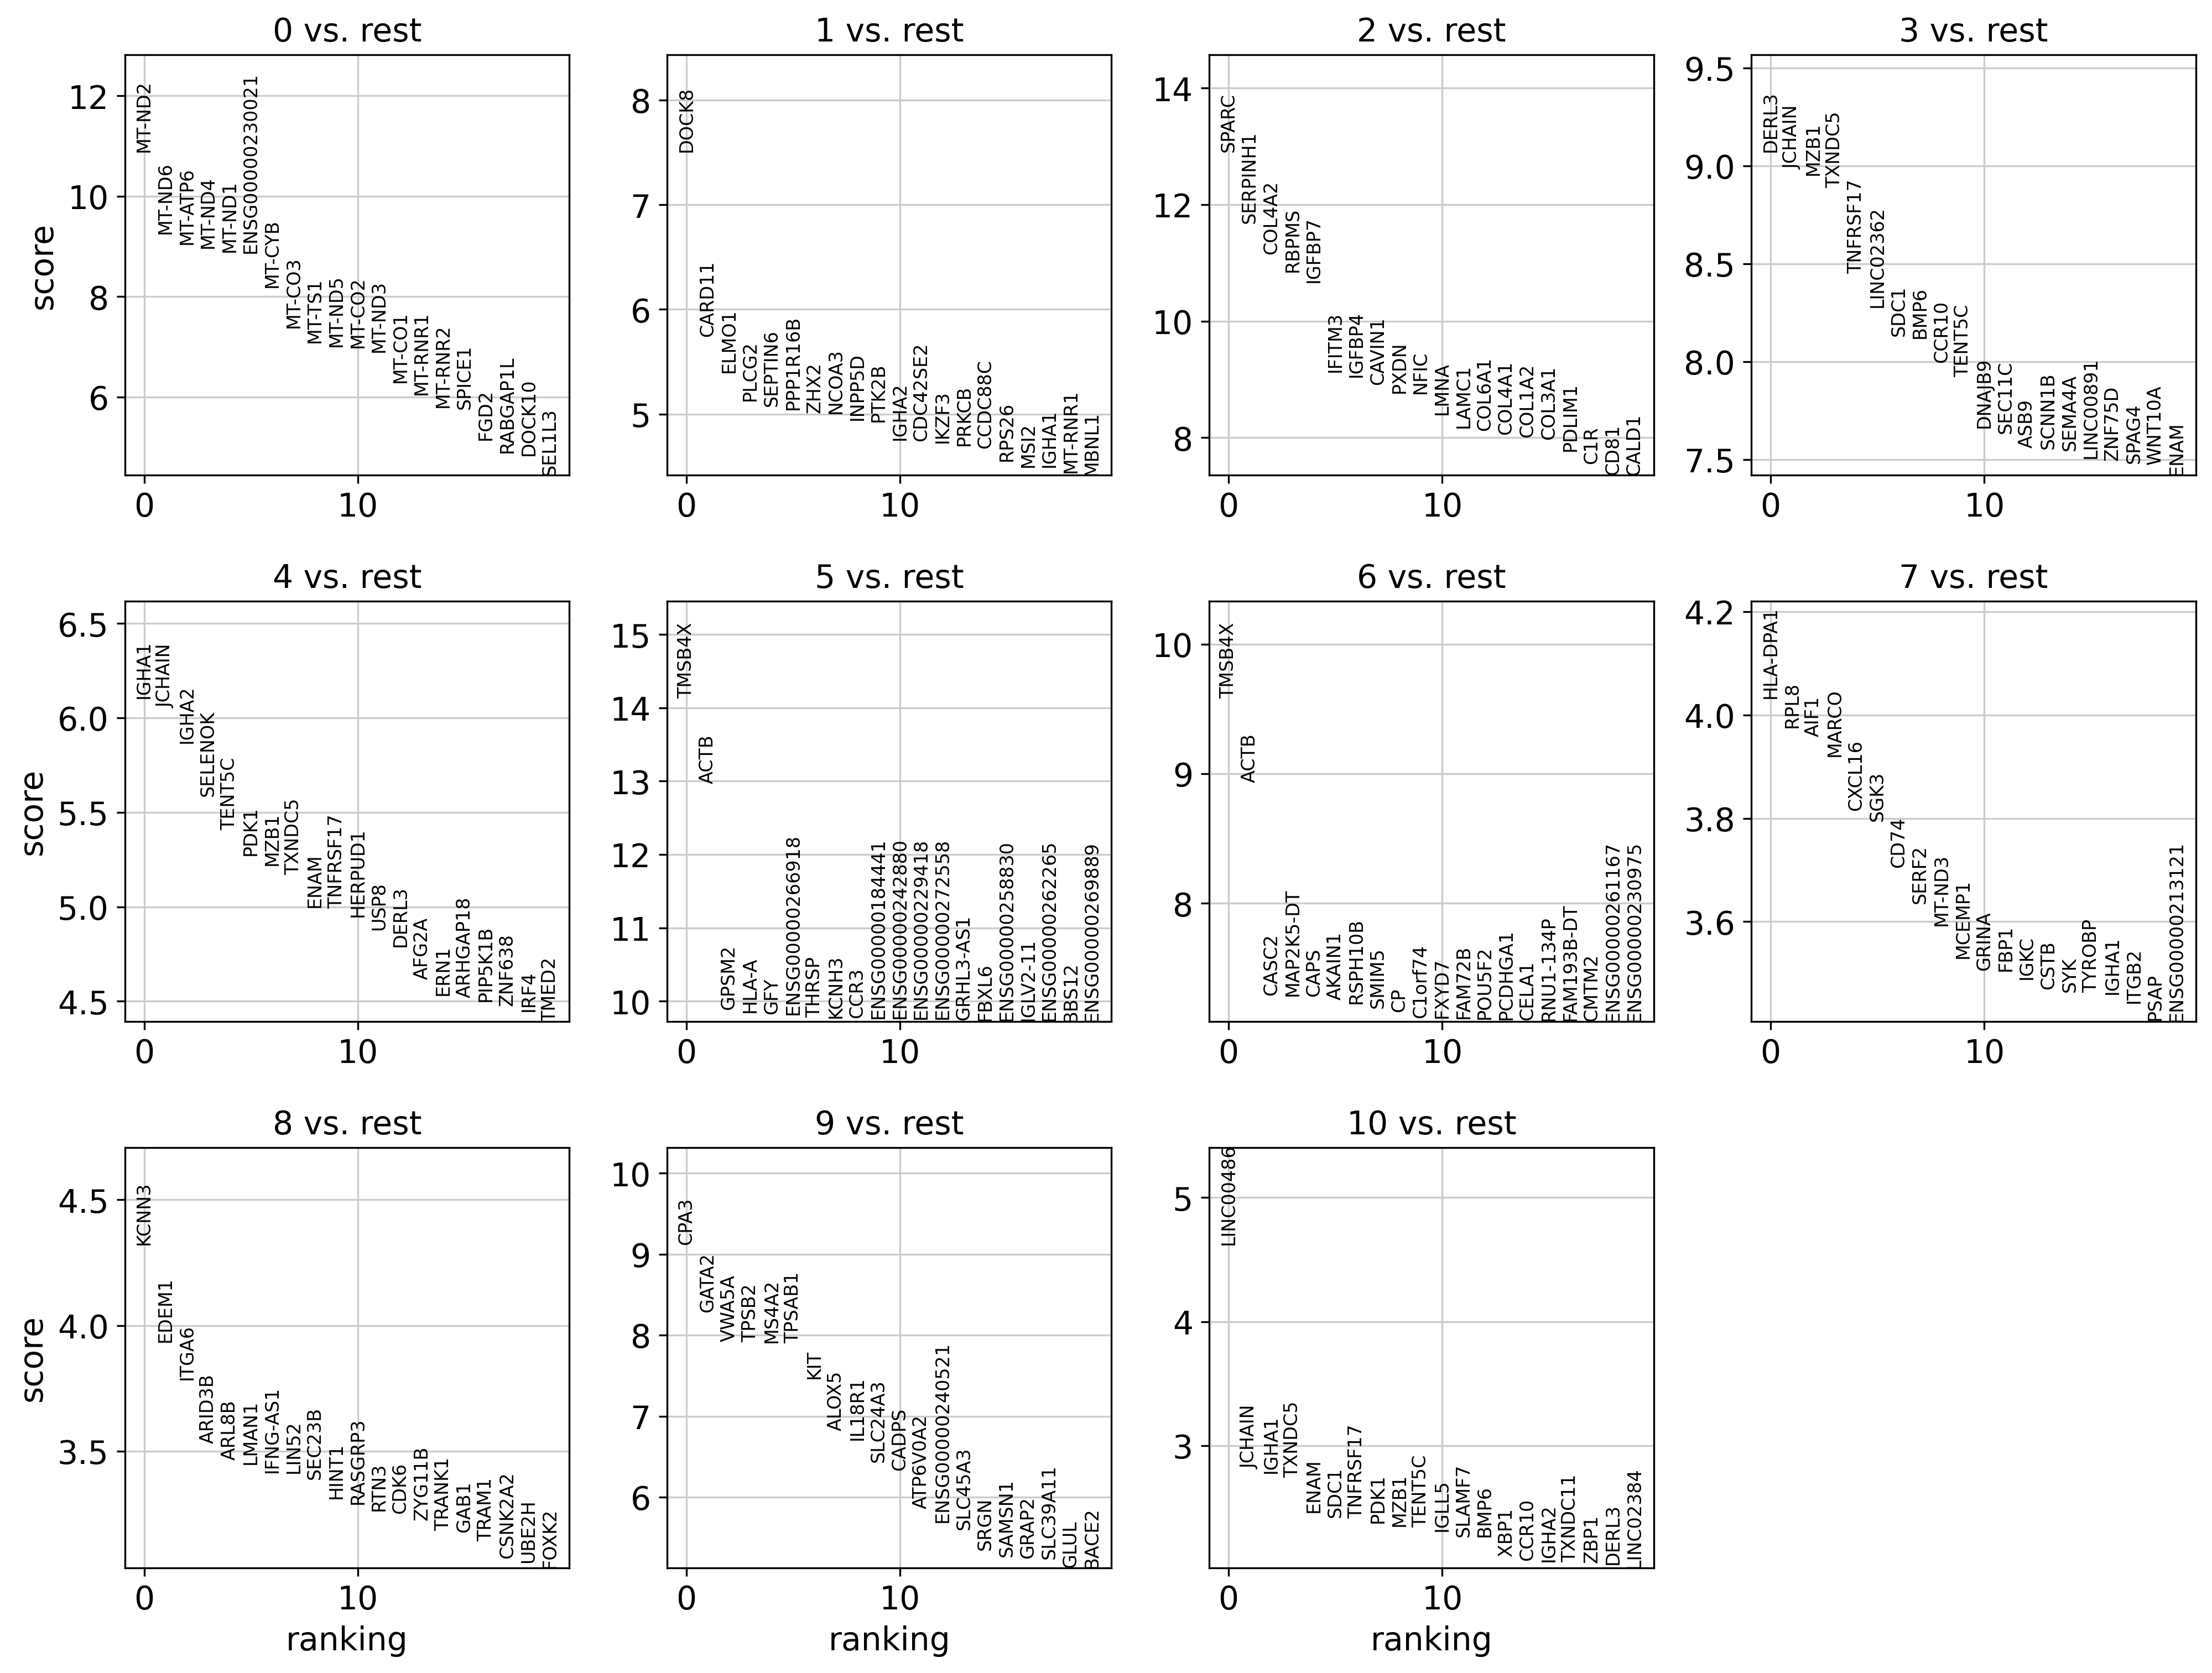

In [84]:
sc.pl.rank_genes_groups( dat_combo_inner, key='leiden_cluster', sharey= False )

In [89]:
markers = ['CD79A', 'CD8A', 'COL1A1', 'S100A8', 'PECAM1', 'KIT','IRF4', 'TMSB4X', 'SPARC' ]

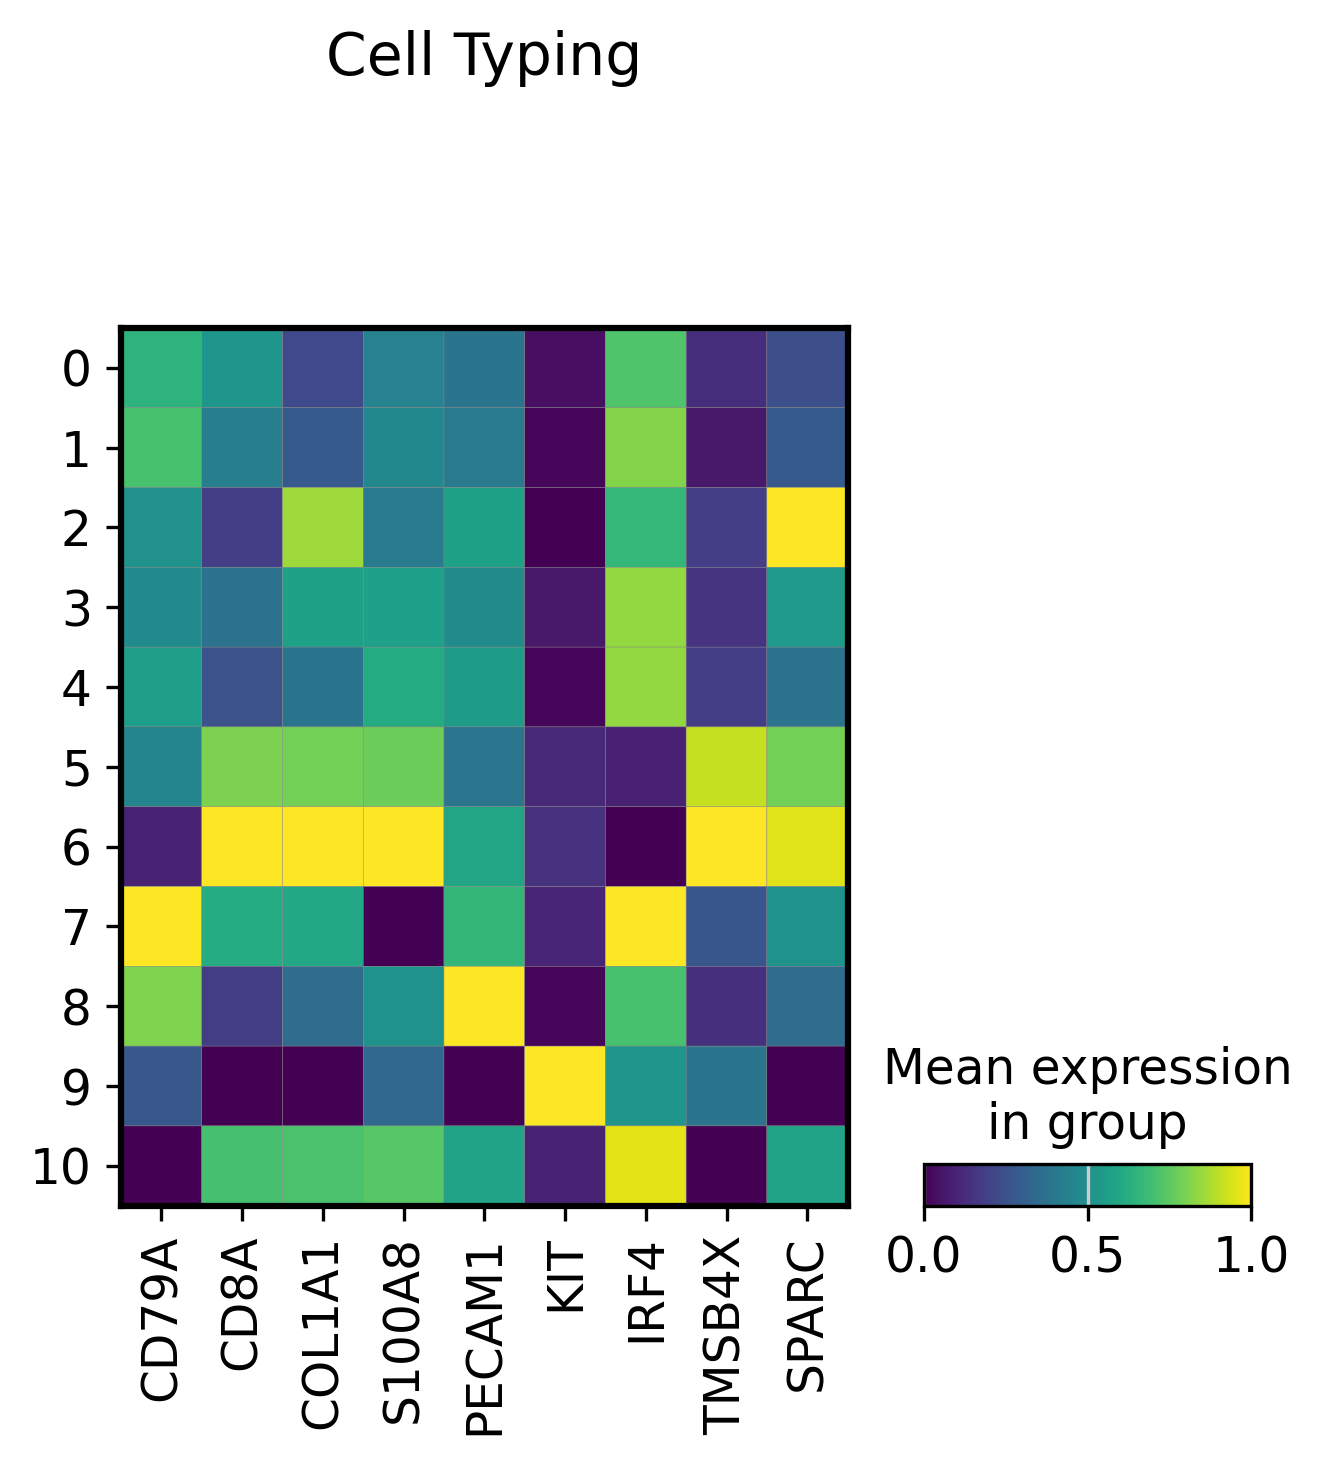

In [90]:
sc.pl.matrixplot(dat_combo_inner, var_names = markers, groupby = 'leiden', title = 'Cell Typing', use_raw = False, standard_scale = 'var')

In [95]:
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat_combo_inner.obs['leiden']):
    if np.isin(x, ['7']):
        example_celltypes.append('B cells')
        #https://www.google.com/search?q=what+type+of+cell+is+cd79a+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zq9RuMrhBsQfcN7forPC3YdCvivnw%3A1738885117566&ei=_UelZ76eIvG1wN4P-aS4yQo&ved=0ahUKEwj-kPPtm7CLAxXxGtAFHXkSLqkQ4dUDCBI&uact=5&oq=what+type+of+cell+is+cd79a+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3doYXQgdHlwZSBvZiBjZWxsIGlzIGNkNzlhIGEgbWFya2VyIGZvcjIIEAAYgAQYogQyBRAAGO8FMgUQABjvBTIFEAAY7wVI0jZQ2wRY2jNwAngBkAEAmAFboAG-BKoBATe4AQPIAQD4AQGYAgigAosEwgIKEAAYsAMY1gQYR8ICCBAhGKABGMMEmAMAiAYBkAYIkgcBOKAHpxg&sclient=gws-wiz-serp
    elif np.isin(x, ['8']):
        example_celltypes.append('endothelial cells')
        #https://www.google.com/search?q=what+type+of+cell+is+pecam1+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zpnrf1rs6nfwStlrAc5bFZoEFOcYw%3A1738885302626&ei=tkilZ6j5JdHawN4Pj7PlOQ&ved=0ahUKEwiorJLGnLCLAxVRLdAFHY9ZOQcQ4dUDCBI&uact=5&oq=what+type+of+cell+is+pecam1+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiKHdoYXQgdHlwZSBvZiBjZWxsIGlzIHBlY2FtMSBhIG1hcmtlciBmb3IyChAhGKABGMMEGApImxFQgAVYvgxwAngBkAEAmAFhoAHyA6oBATa4AQPIAQD4AQGYAgigAo0EwgIKEAAYsAMY1gQYR8ICCBAAGIAEGKIEwgIFEAAY7wXCAggQIRigARjDBJgDAIgGAZAGCJIHAzcuMaAH5hc&sclient=gws-wiz-serp
    elif x == '9':
        example_celltypes.append('hematopoietic stem cells')
        #https://www.google.com/search?client=safari&rls=en&q=what+type+of+cells+is+kit+a+marker+for&ie=UTF-8&oe=UTF-8
    elif np.isin(x, ['2']):
        example_celltypes.append('myeloid-derived suppressor cell')
        #https://www.google.com/search?q=what+type+of+cell+is+sparc+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zr3gwbRUMfYQrsyPsYpvAIRb7Wbpw%3A1738885710904&ei=TkqlZ6jkNv2Gp84PtarxiQo&ved=0ahUKEwiow-mInrCLAxV9w8kDHTVVPKEQ4dUDCBI&uact=5&oq=what+type+of+cell+is+sparc+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3doYXQgdHlwZSBvZiBjZWxsIGlzIHNwYXJjIGEgbWFya2VyIGZvcjIIECEYoAEYwwQyCBAhGKABGMMEMggQIRigARjDBDIIECEYoAEYwwRI1QpQgwRYlQlwAngBkAEAmAFzoAG7A6oBAzQuMbgBA8gBAPgBAZgCBqAC3QLCAgoQABiwAxjWBBhHmAMAiAYBkAYIkgcBNqAHqBs&sclient=gws-wiz-serp

dat_combo_inner.obs['Cell_Types'] = example_celltypes

ValueError: Length of values (990) does not match length of index (4535)

In [97]:
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat_combo_inner.obs['leiden']):
    if np.isin(x, ['7']):
        example_celltypes.append('B cells')
        #https://www.google.com/search?q=what+type+of+cell+is+cd79a+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zq9RuMrhBsQfcN7forPC3YdCvivnw%3A1738885117566&ei=_UelZ76eIvG1wN4P-aS4yQo&ved=0ahUKEwj-kPPtm7CLAxXxGtAFHXkSLqkQ4dUDCBI&uact=5&oq=what+type+of+cell+is+cd79a+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3doYXQgdHlwZSBvZiBjZWxsIGlzIGNkNzlhIGEgbWFya2VyIGZvcjIIEAAYgAQYogQyBRAAGO8FMgUQABjvBTIFEAAY7wVI0jZQ2wRY2jNwAngBkAEAmAFboAG-BKoBATe4AQPIAQD4AQGYAgigAosEwgIKEAAYsAMY1gQYR8ICCBAhGKABGMMEmAMAiAYBkAYIkgcBOKAHpxg&sclient=gws-wiz-serp
    elif np.isin(x, ['8']):
        example_celltypes.append('endothelial cells')
        #https://www.google.com/search?q=what+type+of+cell+is+pecam1+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zpnrf1rs6nfwStlrAc5bFZoEFOcYw%3A1738885302626&ei=tkilZ6j5JdHawN4Pj7PlOQ&ved=0ahUKEwiorJLGnLCLAxVRLdAFHY9ZOQcQ4dUDCBI&uact=5&oq=what+type+of+cell+is+pecam1+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiKHdoYXQgdHlwZSBvZiBjZWxsIGlzIHBlY2FtMSBhIG1hcmtlciBmb3IyChAhGKABGMMEGApImxFQgAVYvgxwAngBkAEAmAFhoAHyA6oBATa4AQPIAQD4AQGYAgigAo0EwgIKEAAYsAMY1gQYR8ICCBAAGIAEGKIEwgIFEAAY7wXCAggQIRigARjDBJgDAIgGAZAGCJIHAzcuMaAH5hc&sclient=gws-wiz-serp
    elif x == '9':
        example_celltypes.append('hematopoietic stem cells')
        #https://www.google.com/search?client=safari&rls=en&q=what+type+of+cells+is+kit+a+marker+for&ie=UTF-8&oe=UTF-8
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat_combo_inner.obs['leiden']):
    if np.isin(x, ['7']):
        example_celltypes.append('B cells')
        #https://www.google.com/search?q=what+type+of+cell+is+cd79a+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zq9RuMrhBsQfcN7forPC3YdCvivnw%3A1738885117566&ei=_UelZ76eIvG1wN4P-aS4yQo&ved=0ahUKEwj-kPPtm7CLAxXxGtAFHXkSLqkQ4dUDCBI&uact=5&oq=what+type+of+cell+is+cd79a+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3doYXQgdHlwZSBvZiBjZWxsIGlzIGNkNzlhIGEgbWFya2VyIGZvcjIIEAAYgAQYogQyBRAAGO8FMgUQABjvBTIFEAAY7wVI0jZQ2wRY2jNwAngBkAEAmAFboAG-BKoBATe4AQPIAQD4AQGYAgigAosEwgIKEAAYsAMY1gQYR8ICCBAhGKABGMMEmAMAiAYBkAYIkgcBOKAHpxg&sclient=gws-wiz-serp
    elif np.isin(x, ['8']):
        example_celltypes.append('endothelial cells')
        #https://www.google.com/search?q=what+type+of+cell+is+pecam1+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zpnrf1rs6nfwStlrAc5bFZoEFOcYw%3A1738885302626&ei=tkilZ6j5JdHawN4Pj7PlOQ&ved=0ahUKEwiorJLGnLCLAxVRLdAFHY9ZOQcQ4dUDCBI&uact=5&oq=what+type+of+cell+is+pecam1+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiKHdoYXQgdHlwZSBvZiBjZWxsIGlzIHBlY2FtMSBhIG1hcmtlciBmb3IyChAhGKABGMMEGApImxFQgAVYvgxwAngBkAEAmAFhoAHyA6oBATa4AQPIAQD4AQGYAgigAo0EwgIKEAAYsAMY1gQYR8ICCBAAGIAEGKIEwgIFEAAY7wXCAggQIRigARjDBJgDAIgGAZAGCJIHAzcuMaAH5hc&sclient=gws-wiz-serp
    elif x == '9':
        example_celltypes.append('hematopoietic stem cells')
        #https://www.google.com/search?client=safari&rls=en&q=what+type+of+cells+is+kit+a+marker+for&ie=UTF-8&oe=UTF-8
    elif np.isin(x, ['2']):
        example_celltypes.append('myeloid-derived suppressor cell')
        #https://www.google.com/search?q=what+type+of+cell+is+sparc+a+marker+for&client=safari&sca_esv=7ddb56b064a9341d&rls=en&sxsrf=AHTn8zr3gwbRUMfYQrsyPsYpvAIRb7Wbpw%3A1738885710904&ei=TkqlZ6jkNv2Gp84PtarxiQo&ved=0ahUKEwiow-mInrCLAxV9w8kDHTVVPKEQ4dUDCBI&uact=5&oq=what+type+of+cell+is+sparc+a+marker+for&gs_lp=Egxnd3Mtd2l6LXNlcnAiJ3doYXQgdHlwZSBvZiBjZWxsIGlzIHNwYXJjIGEgbWFya2VyIGZvcjIIECEYoAEYwwQyCBAhGKABGMMEMggQIRigARjDBDIIECEYoAEYwwRI1QpQgwRYlQlwAngBkAEAmAFzoAG7A6oBAzQuMbgBA8gBAPgBAZgCBqAC3QLCAgoQABiwAxjWBBhHmAMAiAYBkAYIkgcBNqAHqBs&sclient=gws-wiz-serp
    else: #This "else" statement addresses the root cause of the issue
        example_celltypes.append('Unknown') # Assign 'Unknown' to cells that don't match other criteria

dat_combo_inner.obs['Cell_Types'] = example_celltypes

dat_combo_inner.obs['Cell_Types'] = example_celltypes

In [ ]:
example_celltypes = []
for x in (dat.obs['leiden']):
    if np.isin(x, ['0']):
        example_celltypes.append('T cells')
    elif np.isin(x, ['1']):
        example_celltypes.append('NK cells')
    elif x == '3':
        example_celltypes.append('B cells')
    elif np.isin(x, ['2', '4']):
        example_celltypes.append('Monocytes')
    elif x == '5':
        example_celltypes.append('Dendritic cells')

dat.obs['Cell_Types'] = example_celltypes

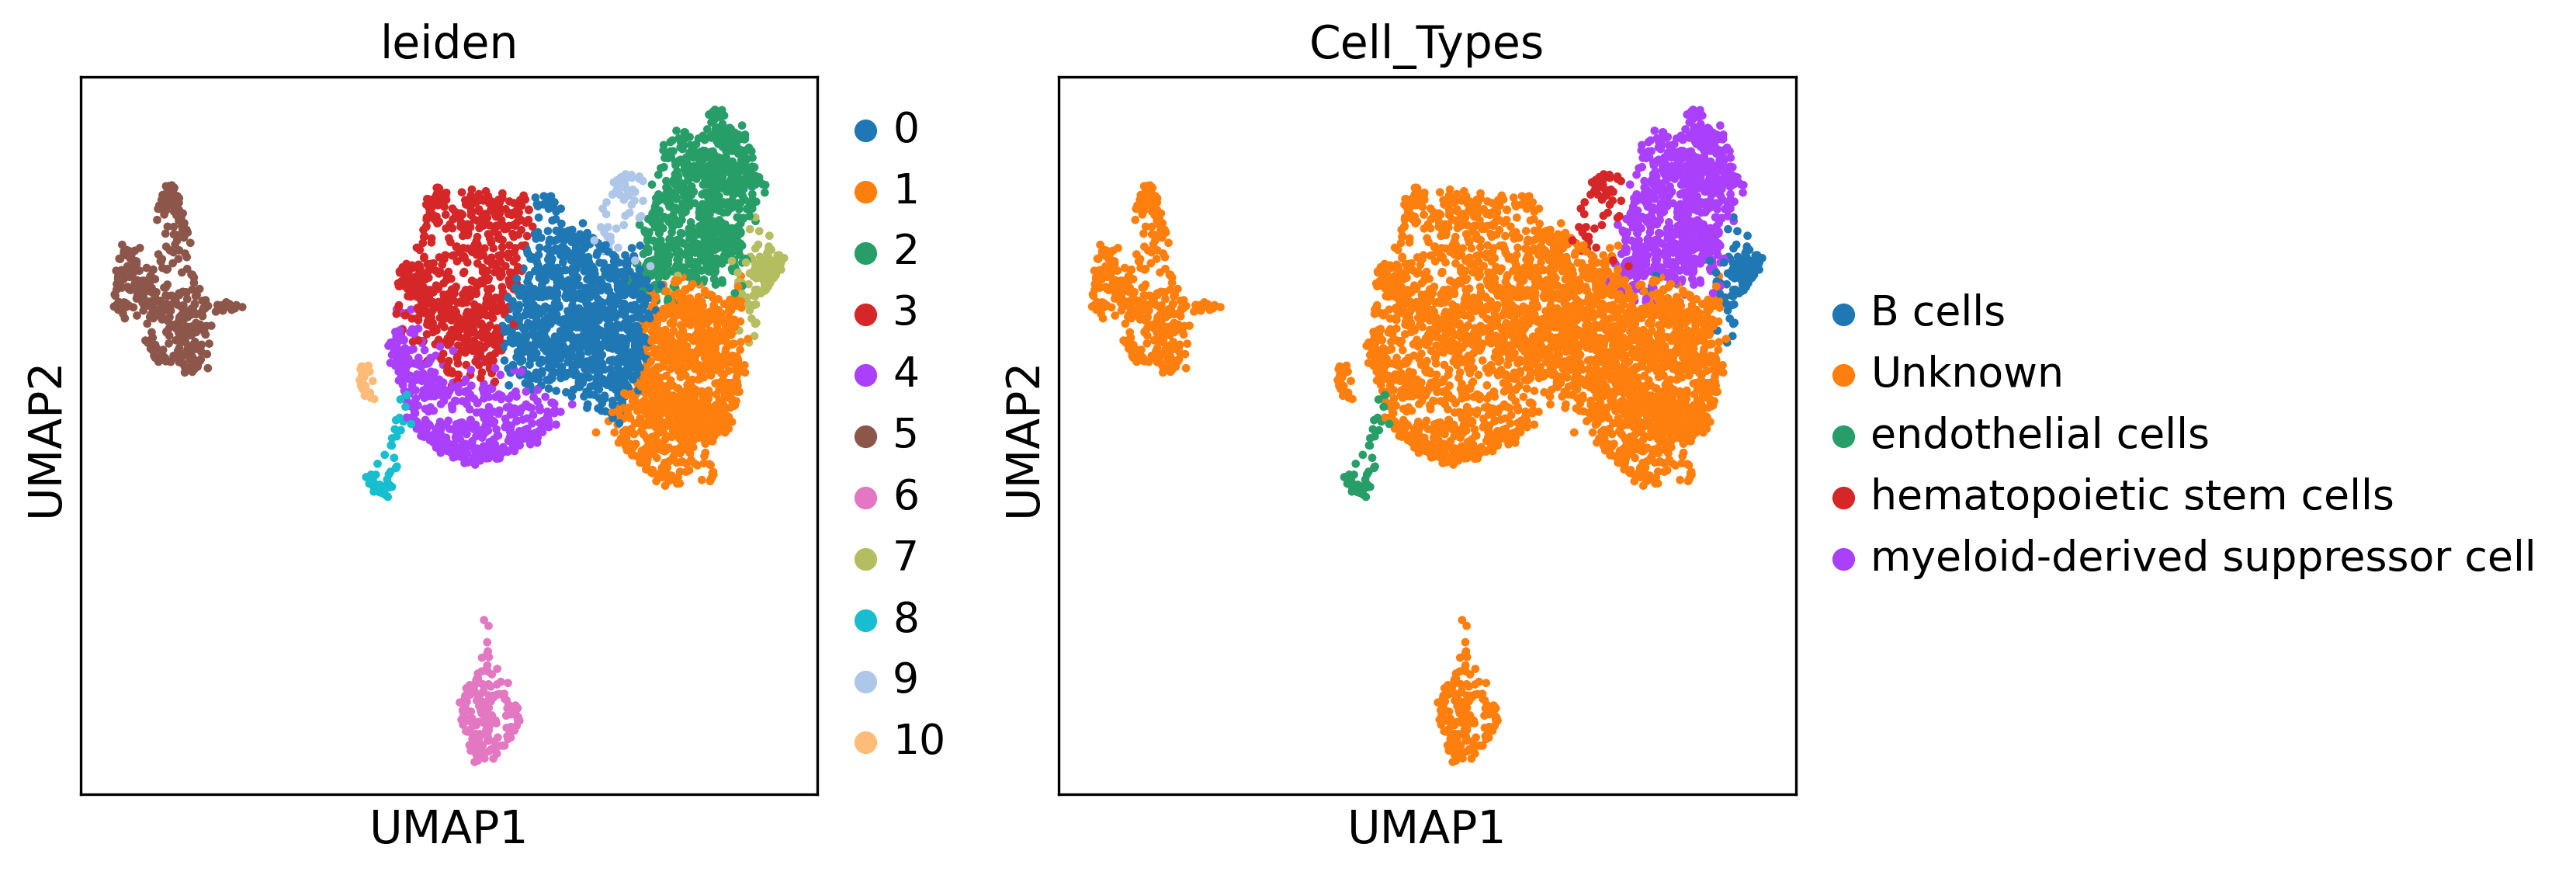

In [98]:
sc.pl.umap( dat_combo_inner, color = ['leiden', 'Cell_Types'])

In [ ]:
# Add a variable to the anndata object to identify cells

example_clusters = []
for x in (dat.obs['Cell_Types']):
    if np.isin(x, ['T cells', 'NK cells']):
        example_clusters.append('Cluster 1')
    elif x == 'B cells':
        example_clusters.append('Cluster 2')
    elif np.isin(x, ['Monocytes', 'Dendritic cells']):
        example_clusters.append('Cluster 3')

dat.obs['Clustering_Example'] = example_clusters

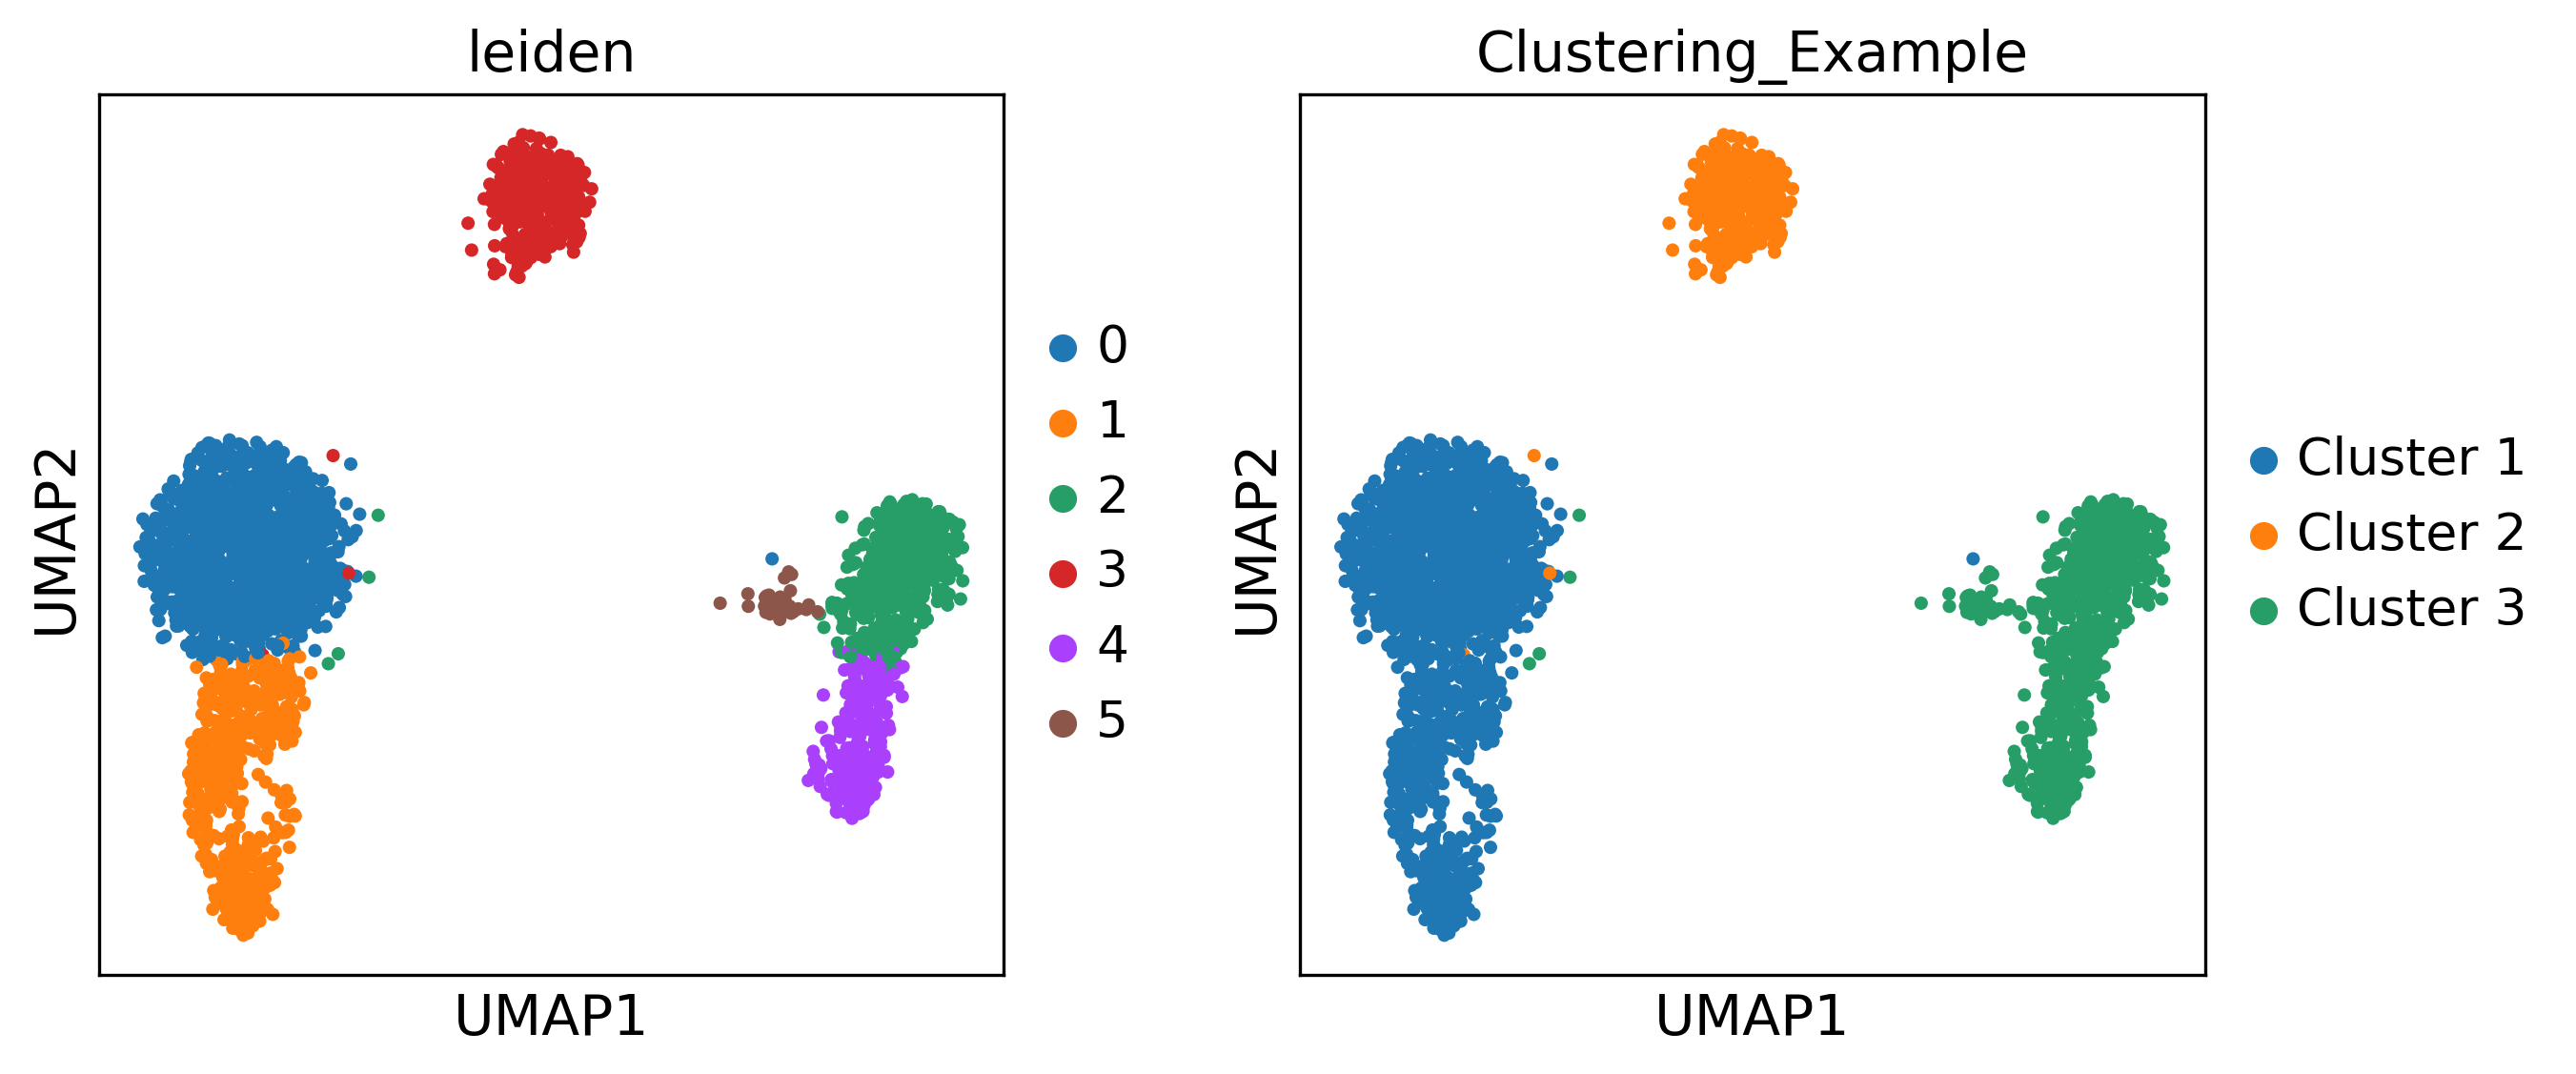

In [ ]:
sc.pl.umap( dat, color = ['leiden', 'Clustering_Example'])

# Integrating Datasets

In [57]:
#Read in the datasets of interest
dataset_1 = sc.read('L5_Dataset1_v2.h5ad')
dataset_2 = sc.read('L5_Dataset2_v2.h5ad')


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [58]:
dataset_1

AnnData object with n_obs × n_vars = 2335 × 29577
    var: 'ENSG_ID'

In [59]:
dataset_2

AnnData object with n_obs × n_vars = 2200 × 29577
    var: 'ENSG_ID'

In [61]:
#combine anndata objects with inner concat
dat_combo_inner = ad.concat([dataset_1, dataset_2], join = 'inner', label = 'Dataset_ID', keys = ['Set1', 'Set2'])

ValueError: cannot reindex on an axis with duplicate labels

In [56]:
dat_combo_inner

AnnData object with n_obs × n_vars = 4535 × 29575
    obs: 'Dataset_ID'

In [53]:
# Check for duplicate indices in dataset_1 and dataset_2
print("Duplicate indices in dataset_1:", dataset_1.var_names[dataset_1.var_names.duplicated()].unique())
print("Duplicate indices in dataset_2:", dataset_2.var_names[dataset_2.var_names.duplicated()].unique())

# If duplicates are found, consider one of the following solutions:
# 1. Drop duplicates from the original datasets:
dataset_1 = dataset_1[:, ~dataset_1.var_names.duplicated(keep='first')]
dataset_2 = dataset_2[:, ~dataset_2.var_names.duplicated(keep='first')]

# 2. Make the index unique using var_names_make_unique:
dataset_1.var_names_make_unique()
dataset_2.var_names_make_unique()

# After ensuring unique indices, proceed with concatenation:
dat_combo_inner = ad.concat([dataset_1, dataset_2], join='outer', label='Dataset_ID', keys=['n_obs', 'n_vars'])

Duplicate indices in dataset_1: Index(['LINC03021', 'LINC03025'], dtype='object')
Duplicate indices in dataset_2: Index(['LINC03021', 'LINC03025'], dtype='object')


In [54]:
dat_combo_inner

AnnData object with n_obs × n_vars = 4535 × 29575
    obs: 'Dataset_ID'

In [47]:
# Check for duplicate indices in dataset_1 and dataset_2
print("Duplicate indices in dataset_1:", dataset_1.var_names[dataset_1.var_names.duplicated()].unique())
print("Duplicate indices in dataset_2:", dataset_2.var_names[dataset_2.var_names.duplicated()].unique())

# Check for duplicate indices in dataset_1 and dataset_2
print("Duplicate indices in dataset_1:", dataset_1.var_names[dataset_1.var_names.duplicated()].unique())
print("Duplicate indices in dataset_2:", dataset_2.var_names[dataset_2.var_names.duplicated()].unique())

# If duplicates are found, consider one of the following solutions:
# 1. Drop duplicates from the original datasets:
dataset_1 = dataset_1[:, ~dataset_1.var_names.duplicated(keep='first')]

Duplicate indices in dataset_1: Index(['LINC03021', 'LINC03025'], dtype='object')
Duplicate indices in dataset_2: Index(['LINC03021', 'LINC03025'], dtype='object')
Duplicate indices in dataset_1: Index(['LINC03021', 'LINC03025'], dtype='object')
Duplicate indices in dataset_2: Index(['LINC03021', 'LINC03025'], dtype='object')


In [ ]:
dat_combo_inner

AnnData object with n_obs × n_vars = 3831 × 38
    obs: 'Dataset_ID'

In [ ]:
dat_combo_inner.X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#combine anndata objects with outer concat and NaN fill value
dat_combo_outer_NaN = ad.concat([dat1, dat2], join = 'outer', fill_value = 'NaN', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer_NaN

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer_NaN.X

array([['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [ ]:
#combine anndata objects with outer concat and 0 fill value
dat_combo_outer = ad.concat([dat1, dat2], join = 'outer', fill_value = '0', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer.X

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)